흑백 옷 그림 28 * 28 픽셀의

0 ~ 9개의 분류값(정답)

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
print(tf.__version__)

2.4.1


In [2]:
# 데이터 정의
(x_train, t_train),(x_test, t_test) = fashion_mnist.load_data()

print("train shape: ", x_train.shape)
print("train label shape: ", t_train.shape)
print("test shape: ", t_train.shape)
print('test label shape: ', t_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
train shape:  (60000, 28, 28)
train label shape:  (60000,)
test shape:  (60000,)
test label shape:  (10000,)


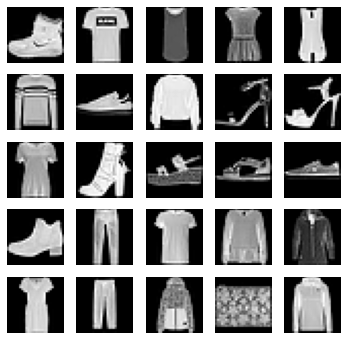

In [3]:
import matplotlib.pyplot as plt

# 25개만 출력하기
plt.figure(figsize=(6,6))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')
plt.show()

In [4]:
# 데이터 전처리

x_train= (x_train - 0.0)/(255.0 - 0.0)
x_test = (x_test - 0.0)/(255.0 - 0.0)

# 원핫 인코딩 없이 이따가 loss = 'sparse_categorical_crossentropy' 로 모델 컴파일때 넣기

In [5]:
# 모델 구축
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(100, activation='relu'))
# 정답의 개수가 10개여서 출력층에 10개 넣기
model.add(Dense(10, activation='softmax'))

In [6]:
# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 모델 학습
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)


Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6908 - accuracy: 0.7601 - val_loss: 0.4138 - val_accuracy: 0.8552
Epoch 2/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4094 - accuracy: 0.8538 - val_loss: 0.3941 - val_accuracy: 0.8576
Epoch 3/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3668 - accuracy: 0.8664 - val_loss: 0.3914 - val_accuracy: 0.8535
Epoch 4/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3321 - accuracy: 0.8786 - val_loss: 0.3569 - val_accuracy: 0.8702
Epoch 5/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3097 - accuracy: 0.8866 - val_loss: 0.3395 - val_accuracy: 0.8786
Epoch 6/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2943 - accuracy: 0.8916 - val_loss: 0.3336 - val_accuracy: 0.8819
Epoch 7/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.8961 - val_loss: 0.3450 - val_accuracy:

In [8]:
# 모델 평가
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.8764


[0.4423832595348358, 0.8763999938964844]

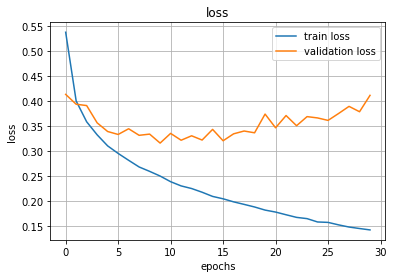

In [10]:
# 손실 그래프
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')
plt.show()

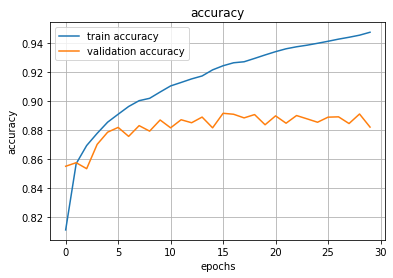

In [11]:
# 정확도 그래프
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')
plt.legend(loc = 'best')
plt.show()

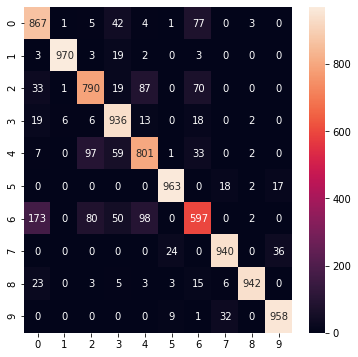

In [14]:
# 혼동 행렬

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))
pred_val = model.predict(x_test)

cm = confusion_matrix(t_test, np.argmax(pred_val, axis = -1))

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()